In [1]:
import os
os.chdir('../../..')

In [2]:
import convokit
from convokit import TextParser, TensorDecomposer, Corpus, download

In [3]:
corpus = Corpus(filename='convokit/tensors/longreddit_construction/long-reddit-corpus-liwc')

### Truncating the corpus

In [4]:
cats = {'adverb', 'article', 'auxverb', 'conj', 'ipron', 'i', 
        'we', 'you', 'shehe', 'they', 'prep', 'negate', 'interrog', 'quant'}


# for utt in corpus.iter_utterances():
#     if 'prep' in utt.meta:
#         for cat in cats:
#             utt.meta[cat+'-present'] = (utt.meta[cat]) > 0

In [5]:
corpus.print_summary_stats()

Number of Speakers: 344223
Number of Utterances: 1085877
Number of Conversations: 29487


In [6]:
for convo in corpus.iter_conversations():
    convo.meta['subreddit'] = convo.get_utterance(convo.id).meta['subreddit']

In [9]:
# deleting unnecessary fields
utt = corpus.random_utterance()
del utt.meta['stickied']
del utt.meta['gilded']
del utt.meta['gildings']
del utt.meta['original']

In [18]:
m = corpus.random_utterance().meta

In [22]:
for utt in corpus.iter_utterances():
    if 'liwc' in utt.meta:
        for c in cats:
            utt.meta[c] = utt.meta['liwc'][c]

In [23]:
del utt.meta['liwc']

In [ ]:
corpus.dump('long-reddit-corpus-liwc-more-lite', base_path='convokit/tensors/longreddit_construction')

## Limiting to three subreddits

In [8]:
convo_df =corpus.get_conversations_dataframe()

In [12]:
from collections import Counter

ctr = Counter(convo_df['meta.subreddit'])



In [14]:
{k: v for k, v in sorted(list(ctr.items()), key=lambda x: x[1])}

{'MakeupAddiction': 114,
 'techsupport': 122,
 'teenagers': 141,
 'NoFap': 148,
 'buildapc': 150,
 'sex': 153,
 'raisedbynarcissists': 160,
 'ShingekiNoKyojin': 162,
 'MGTOW': 174,
 'relationship_advice': 175,
 'Fitness': 182,
 'photography': 186,
 'Minecraft': 188,
 'Drugs': 195,
 'electronic_cigarette': 205,
 'lgbt': 213,
 'pokemon': 214,
 'AskWomen': 217,
 'singapore': 217,
 'Diablo': 222,
 'AmItheAsshole': 223,
 'guns': 225,
 'Python': 225,
 'Random_Acts_Of_Amazon': 227,
 'trees': 233,
 'relationships': 237,
 'antiMLM': 239,
 'skyrim': 239,
 'Conservative': 244,
 '2007scape': 247,
 'anime': 249,
 'Guildwars2': 250,
 'The_Donald': 251,
 'Bitcoin': 253,
 'hockey': 260,
 'starcraft': 264,
 'askscience': 267,
 'Frugal': 269,
 'TheRedPill': 269,
 'lotr': 269,
 'TwoXChromosomes': 269,
 'SquaredCircle': 270,
 'apple': 270,
 'socialism': 271,
 'DotA2': 274,
 'POLITIC': 276,
 'pokemontrades': 277,
 'CFB': 282,
 'Christianity': 296,
 'explainlikeimfive': 297,
 'harrypotter': 297,
 'baseball'

In [30]:
corpus.filter_conversations_by(lambda convo: convo.meta['subreddit'] in ['asoiaf', 'WTF', 'DebateReligion'])

In [31]:
corpus.print_summary_stats()

Number of Speakers: 17243
Number of Utterances: 46339
Number of Conversations: 1183


In [32]:
cats = {'adverb', 'article', 'auxverb', 'conj', 'ipron', 'ppron', 'prep', 'quant'}


# for utt in corpus.iter_utterances():
#     if 'prep' in utt.meta:
#         for cat in cats:
#             utt.meta[cat+'-present'] = (utt.meta[cat]) > 0

In [33]:
# corpus.dump('long-reddit-corpus-liwc-lite', base_path='convokit/tensors/longreddit_construction')

In [34]:
cats
cats_present = {k+"-present" for k in cats}

In [35]:
for convo in corpus.iter_conversations():
    for idx, utt in enumerate(convo.get_chronological_utterance_list()[:20]):
        convo.meta['liwc-{}'.format(idx+1)] = {k: utt.meta[k] for k in cats_present}

In [21]:
td = TensorDecomposer(feature_set=['liwc-{}'.format(idx) for idx in range(1, 20+1)], 
                      obj_type="conversation", tensor_func='tensortools-ncp-bcd', rank=9)

In [22]:
td.fit(corpus)

Constructing tensor...Done.
Decomposing tensor...NCP_BCD: iteration 1, objective 0.6390644144170285, improvement inf.
NCP_BCD: iteration 2, objective 0.6297881239757168, improvement 0.00927629044131173.
NCP_BCD: iteration 3, objective 0.6230058562662141, improvement 0.006782267709502743.
NCP_BCD: iteration 4, objective 0.6172063434379226, improvement 0.005799512828291498.
NCP_BCD: iteration 5, objective 0.6121659354568911, improvement 0.005040407981031447.
NCP_BCD: iteration 6, objective 0.6076534877289913, improvement 0.0045124477278998265.
NCP_BCD: iteration 7, objective 0.6035707507633256, improvement 0.004082736965665745.
NCP_BCD: iteration 8, objective 0.5998932110700659, improvement 0.0036775396932596793.
NCP_BCD: iteration 9, objective 0.5966870836728947, improvement 0.003206127397171188.
NCP_BCD: iteration 10, objective 0.5940209565610207, improvement 0.0026661271118739727.
NCP_BCD: iteration 11, objective 0.5918633445565837, improvement 0.0021576120044369818.
NCP_BCD: iteratio

IndexError: list index out of range

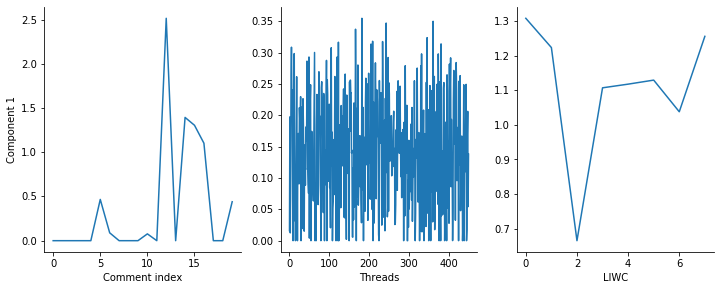

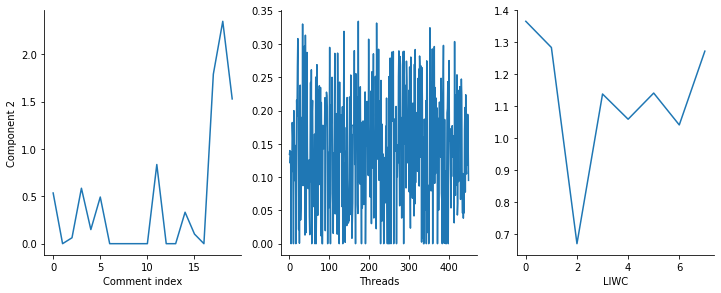

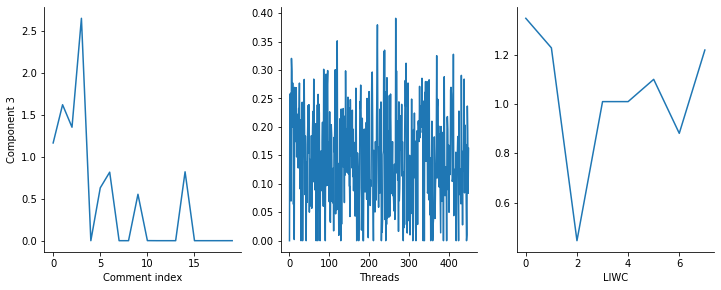

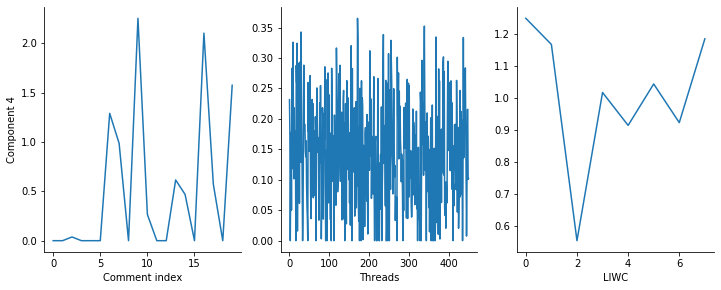

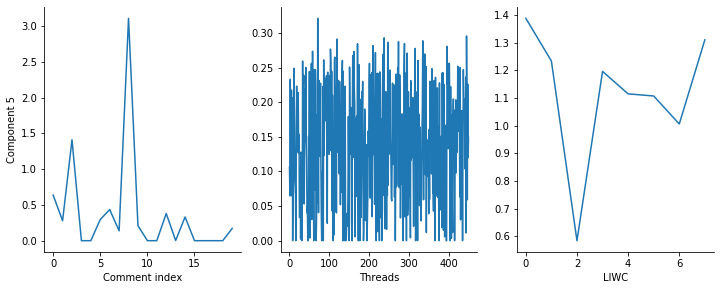

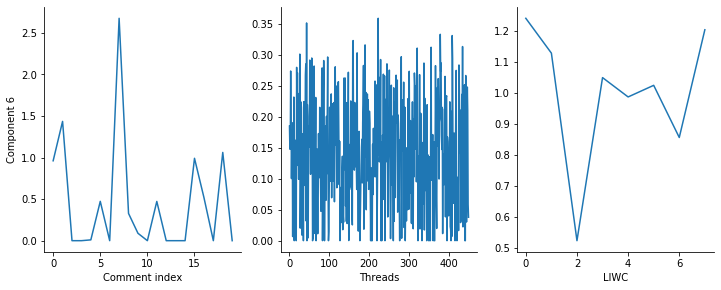

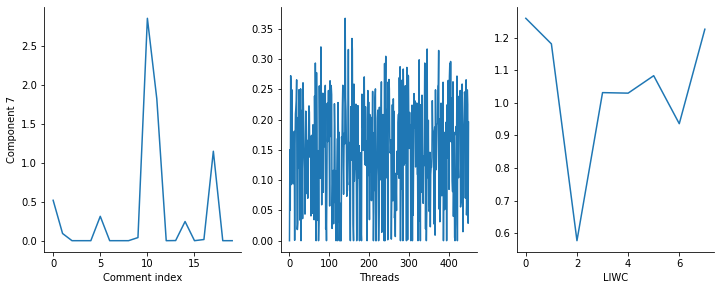

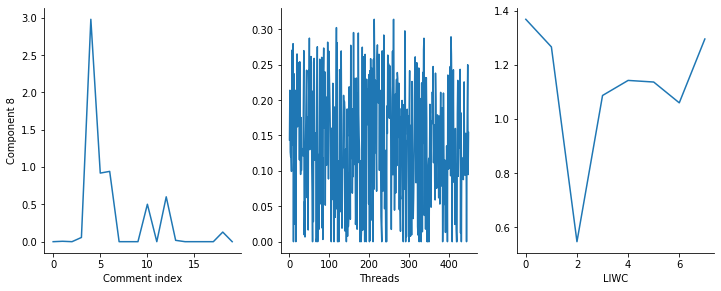

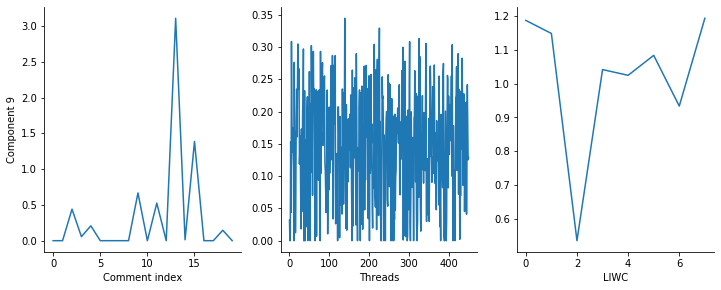

In [25]:
td.summarize(corpus, axis_names=['Comment index', 'Threads', 'LIWC'], 
            output_dir='convokit/tensor_decomposer/reports/liwc-TCA')

In [36]:
corpus.dump('convokit/tensors/longreddit_construction/long-reddit-corpus-liwc-lite-trio', base_path='.')

In [26]:
convo_df

,meta.subreddit
id,
dnxhx8v,MaliciousCompliance
dnzy9si,MaliciousCompliance
do0yum4,MaliciousCompliance
do6tiw0,MaliciousCompliance
do6xh1i,MaliciousCompliance
do8fd2x,MaliciousCompliance
dodtrwe,MaliciousCompliance
dog3sjj,MaliciousCompliance
dowv9je,MaliciousCompliance
